In [1]:
from elasticsearch import Elasticsearch
import elasticsearch.helpers
from elasticsearch_dsl import Search
import pandas as pd
import urllib3
import json
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [2]:
es = Elasticsearch(['https://10.19.89.215:9200'],
ca_certs=False,verify_certs=False, http_auth=('jupyter','B3@+Navy!!'))
searchContext = Search(using=es, index='*:so-*', doc_type='doc')

C:\Users\Michael Grimm\anaconda3\lib\site-packages\elasticsearch\connection\http_urllib3.py:209: UserWarning: Connecting to https://10.19.89.215:9200 using SSL with verify_certs=False is insecure.
  warnings.warn(


In [ ]:
# ourGen = elasticsearch.helpers.scan(
#     es,
#     query = 'event.module:kibana',
#     scroll = '100m',
#     preserve_order = False,
#     size = 100,
#     request_timeout = None,
#     clear_scroll = True
# )
# an example of using elasticsearch.helpers to create a generator

In [3]:
s = searchContext.query('query_string', query='event.dataset: alert')
# s = s.source(['metadata','agent','process','@timestamp','transaction'])

In [4]:
response = s.execute()

if response.success():
  df = pd.DataFrame((d.to_dict() for d in s.scan()))
df

C:\Users\Michael Grimm\anaconda3\lib\site-packages\elasticsearch_dsl\search.py:715: ElasticsearchWarning: The client is unable to verify that the server is Elasticsearch due security privileges on the server side
  self, es.search(index=self._index, body=self.to_dict(), **self._params)


,metadata,log,destination,rule,source,network,observer,ecs,@version,host,...,tags,@timestamp,destination_geo,source_geo,agent,manager,decoder,process,wazuh,user
0,"{'beat': 'filebeat', 'ip_address': '172.17.0.1...",{'file': {'path': '/nsm/suricata/eve-2022-09-2...,"{'port': 0, 'ip': '10.3.94.254'}","{'severity': 3, 'reference': 'https://doc.emer...","{'port': 0, 'ip': '10.3.94.250'}",{'community_id': '1:Ga0HRBs8DG52vzntOnMmCu4URa...,{'name': 'seconion'},{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-09-29T23:59:44.735Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'beat': 'filebeat', 'ip_address': '172.17.0.1...",{'file': {'path': '/nsm/suricata/eve-2022-09-3...,"{'port': 7680, 'ip': '10.10.2.168'}","{'severity': 3, 'reference': 'https://doc.emer...","{'port': 49184, 'ip': '10.19.89.6'}",{'community_id': '1:Odo/zFKiLaeO3wl30vAbZlJArE...,{'name': 'seconion'},{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-09-30T23:59:27.496Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'beat': 'filebeat', 'ip_address': '172.17.0.1...",{'file': {'path': '/nsm/suricata/eve-2022-10-0...,"{'port': 0, 'ip': '10.3.94.254'}","{'severity': 3, 'reference': 'https://doc.emer...","{'port': 0, 'ip': '10.3.94.250'}",{'community_id': '1:Ga0HRBs8DG52vzntOnMmCu4URa...,{'name': 'seconion'},{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-10-01T23:59:47.417Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'beat': 'filebeat', 'ip_address': '172.17.0.1...",{'file': {'path': '/nsm/suricata/eve-2022-10-0...,"{'port': 0, 'ip': '10.3.94.254'}","{'severity': 3, 'reference': 'https://doc.emer...","{'port': 0, 'ip': '10.3.94.250'}",{'community_id': '1:Ga0HRBs8DG52vzntOnMmCu4URa...,{'name': 'seconion'},{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-10-02T23:59:48.048Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'beat': 'filebeat', 'ip_address': '172.17.0.1...",{'file': {'path': '/nsm/suricata/eve-2022-10-0...,"{'port': 0, 'ip': '10.3.94.254'}","{'severity': 3, 'reference': 'https://doc.emer...","{'port': 0, 'ip': '10.3.94.250'}",{'community_id': '1:Ga0HRBs8DG52vzntOnMmCu4URa...,{'name': 'seconion'},{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-10-03T23:59:53.372Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161311,"{'pipeline': 'ossec', 'beat': 'filebeat', 'ip_...",{'file': {'path': '/wazuh/archives/archives.js...,NaN,"{'firedtimes': 5, 'mail': False, 'level': 3, '...",NaN,NaN,NaN,{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-10-05T18:39:07.769Z,NaN,NaN,"{'ip': '10.19.89.215', 'name': 'seconion', 'id...",{'name': 'seconion-wazuh-manager'},{},NaN,"{'data': {'file': '/etc/ssh/sshd_config', 'tit...",NaN
161312,"{'pipeline': 'ossec', 'beat': 'filebeat', 'ip_...",{'file': {'path': '/wazuh/archives/archives.js...,NaN,"{'firedtimes': 4, 'mail': False, 'level': 3, '...",NaN,NaN,NaN,{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-10-05T18:39:07.769Z,NaN,NaN,"{'ip': '10.19.89.215', 'name': 'seconion', 'id...",{'name': 'seconion-wazuh-manager'},{},NaN,"{'data': {'file': '/etc/ssh/sshd_config', 'tit...",NaN
161313,"{'pipeline': 'ossec', 'beat': 'filebeat', 'ip_...",{'file': {'path': '/wazuh/archives/archives.js...,NaN,"{'firedtimes': 7, 'mail': False, 'level': 3, '...",NaN,NaN,NaN,{'version': '8.0.0'},1,{'name': 'seconion'},...,[beats_input_codec_plain_applied],2022-10-05T18:39:07.769Z,NaN,NaN,"{'ip': '10.19.89.215', 'name': 'seconion', 'id...",{'name': 'seconion-wazuh-manager'},{},NaN,"{'data': {'file': '/etc/ssh/sshd_config', 'tit...",NaN
161314,"{'pipeline': 'ossec', 'beat': 'filebeat', 'ip_...",{'file': {'path': '/wazuh/archives/archives.js...,NaN,"{'mail': False, 'level': 5, 'pci_dss': ['11.5'...",NaN,NaN,NaN,{'version': '8.0.0'},1,"{'syscheck': {'uname_after': 'root', '

In [ ]:
#Query that limits the number of items in the table, only works on event.modules though
response = s.execute()
if response.success():
    df = pd.DataFrame(([d['metadata'],d['log'],d['type'],d['event'], d['fileset'],d['message']] for d in s))
df.columns=['MetaData','Log','Type','Event','FileSet','Message']
df

In [29]:
uniqueDestIPs = df['destination'].value_counts(dropna=True).rename_axis('unique values').to_frame('counts')
uniqueDestIPs

,counts
unique values,
"{'port': 0, 'ip': '10.3.94.254'}",43594
"{'geo': {'continent_name': 'North America', 'region_iso_code': 'US-MA', 'city_name': 'Boston', 'country_iso_code': 'US', 'timezone': 'America/New_York', 'ip': '91.189.91.39', 'country_name': 'United States', 'region_name': 'Massachusetts', 'location': {'lon': -71.0631, 'lat': 42.3562}}, 'port': 80, 'ip': '91.189.91.39'}",21107
"{'geo': {'continent_name': 'North America', 'region_iso_code': 'US-MA', 'city_name': 'Boston', 'country_iso_code': 'US', 'timezone': 'America/New_York', 'ip': '91.189.91.38', 'country_name': 'United States', 'region_name': 'Massachusetts', 'location': {'lon': -71.0631, 'lat': 42.3562}}, 'port': 80, 'ip': '91.189.91.38'}",20080
"{'port': 161, 'ip': '10.13.255.50'}",12038
"{'port': 53, 'ip': '10.13.20.2'}",7550
...,...
"{'port': 61478, 'ip': '10.10.3.2'}",1
"{'geo': {'continent_name': 'North America', 'region_iso_code': 'US-WA', 'city_name': 'Seattle', 'country_iso_code': 'US', 'timezone': 'America/Los_Angeles', 'ip': '13.225.195.42', 'country_name': 'United States', 'region_name': 'Washington', 'location': {'lon': -122.3451, 'lat': 47.6348}}, 'port': 80, 'ip': '13.225.195.42'}",1
"{'port': 61441, 'ip': '10.10.3.2'}",1


<AxesSubplot:xlabel='unique values'>

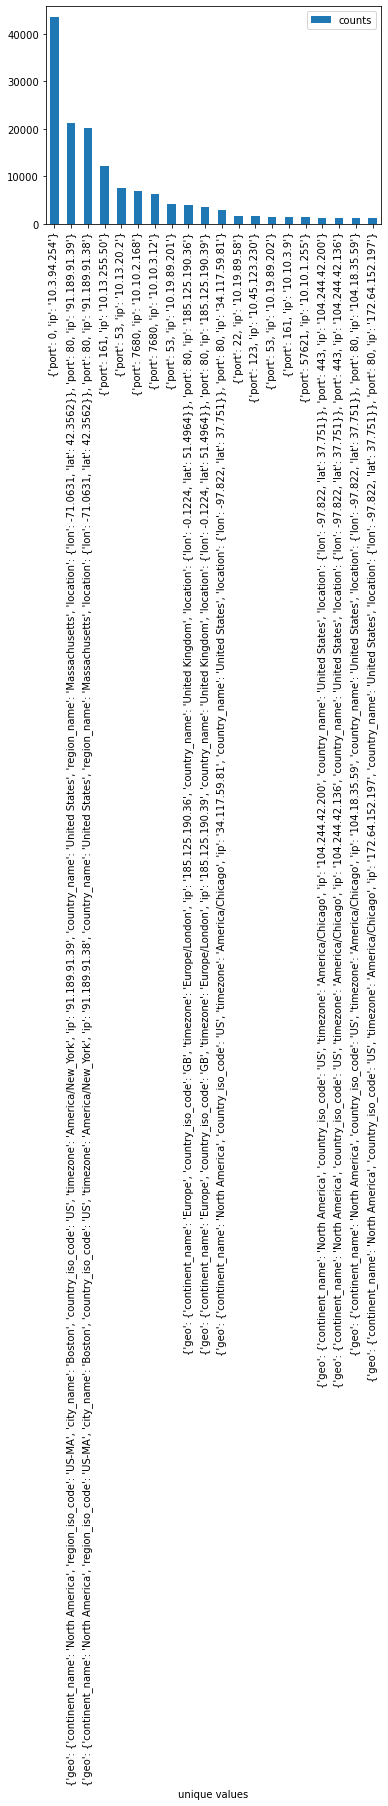

In [33]:
uniqueDestIPs[:20].plot(kind = 'bar')

In [35]:
import os  
os.makedirs('~/capstone/dfCSVs', exist_ok=True)  
df.to_csv('~/capstone/dfCSVs/out.csv') 